### Text Analysis on 800-53 Mapping

Sources:

https://practicaldatascience.co.uk/machine-learning/how-to-preprocess-text-for-nlp-in-four-easy-steps
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [112]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from operator import itemgetter
nlp = spacy.load('en_core_web_sm')

In [74]:
data = pd.read_csv("800-53 Mapping Mar 1.csv")
data.head()

,Identity,Device,Network/Environment,Application Workload,Data,ZT Control Family,Primary Function,Secondary Function,ZT Control Function,ZT Control Maturity Rating,Comments,Control Identifier,Control (or Control Enhancement) Name,Control Text,Discussion,Related Controls
0,NaN,NaN,0,0,0,Multiple,NaN,NaN,Governance,Traditional,AC policies can relate to multiple pillars - i...,AC-1,Policy and Procedures,"a. Develop, document, and disseminate to [Assi...",Access control policy and procedures address t...,"IA-1, PM-9, PM-24, PS-8, SI-12 ."
1,1.0,0.0,0,0,0,Identity,NaN,NaN,All,Traditional,NaN,AC-2,Account Management,a. Define and document the types of accounts a...,Examples of system account types include indiv...,"AC-3, AC-5, AC-6, AC-17, AC-18, AC-20, AC-24, ..."
2,1.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Optimal,NaN,AC-2(1),Account Management | Automated System Account ...,Support the management of system accounts usin...,Automated system account management includes u...,None.
3,0.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Advanced,NaN,AC-2(2),Account Management | Automated Temporary and E...,Automatically [Selection: remove; disable] tem...,Management of temporary and emergency accounts...,None.
4,0.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Traditional,NaN,AC-2(3),Account Management | Disable Accounts,Disable accounts within [Assignment: organizat...,"Disabling expired, inactive, or otherwise anom...",None.


In [75]:
# Create control text dataframe for each pillar
identity_df = data.loc[data['Identity '] == 1][["Control Text"]] # remove the space after 'Identity' for new data
device_df = data.loc[data['Device'] == 1][["Control Text"]] 
net_env_df = data.loc[data['Network/Environment'] == 1][["Control Text"]]
app_workload_df = data.loc[data['Application Workload'] == 1][["Control Text"]]
data_df = data.loc[data['Data'] == 1][["Control Text"]]

In [76]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Claire\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Claire\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Claire\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]

    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [80]:
def remove_stopwords(tokenized_column):
    """Return a list of tokens with English stopwords removed. 

    Args:
        column: Pandas dataframe column of tokenized data from tokenize()

    Returns:
        tokens (list): Tokenized list with stopwords removed.

    """
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]

In [81]:
def apply_stemming(tokenized_column):
    """Return a list of tokens with Porter stemming applied.

    Args:
        column: Pandas dataframe column of tokenized data with stopwords removed.

    Returns:
        tokens (list): Tokenized list with words Porter stemmed.

    """

    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in tokenized_column]

In [82]:
def lemmatizer(tokenized_column):
    wordnet_lemmatizer = WordNetLemmatizer()
    return [wordnet_lemmatizer.lemmatize(word) for word in tokenized_column]

In [83]:
def rejoin_words(tokenized_column):
    """Rejoins a tokenized word list into a single string. 
    
    Args:
        tokenized_column (list): Tokenized column of words. 
        
    Returns:
        string: Single string of untokenized words. 
    """
    
    return (" ".join(tokenized_column))

In [84]:
identity_df['Control Text']= identity_df['Control Text'].apply(lambda x: x.lower())

In [85]:
identity_df['tokenized'] = identity_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
identity_df.head()

,Control Text,tokenized
1,a. define and document the types of accounts a...,"[define, and, document, the, types, of, accoun..."
2,support the management of system accounts usin...,"[support, the, management, of, system, account..."
5,"automatically audit account creation, modifica...","[automatically, audit, account, creation, modi..."
6,require that users log out when [assignment: o...,"[require, that, users, log, out, when, assignm..."
7,implement [assignment: organization-defined dy...,"[implement, assignment, dynamic, privilege, ma..."


In [86]:
identity_df['stopwords_removed'] = identity_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
identity_df.head()

,Control Text,tokenized,stopwords_removed
1,a. define and document the types of accounts a...,"[define, and, document, the, types, of, accoun...","[define, document, types, accounts, allowed, s..."
2,support the management of system accounts usin...,"[support, the, management, of, system, account...","[support, management, system, accounts, using,..."
5,"automatically audit account creation, modifica...","[automatically, audit, account, creation, modi...","[automatically, audit, account, creation, modi..."
6,require that users log out when [assignment: o...,"[require, that, users, log, out, when, assignm...","[require, users, log, assignment, time, period..."
7,implement [assignment: organization-defined dy...,"[implement, assignment, dynamic, privilege, ma...","[implement, assignment, dynamic, privilege, ma..."


In [87]:
identity_df['porter_stemmed'] = identity_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
identity_df.head()

,Control Text,tokenized,stopwords_removed,porter_stemmed
1,a. define and document the types of accounts a...,"[define, and, document, the, types, of, accoun...","[define, document, types, accounts, allowed, s...","[defin, document, type, account, allow, specif..."
2,support the management of system accounts usin...,"[support, the, management, of, system, account...","[support, management, system, accounts, using,...","[support, manag, system, account, use, assign,..."
5,"automatically audit account creation, modifica...","[automatically, audit, account, creation, modi...","[automatically, audit, account, creation, modi...","[automat, audit, account, creation, modif, ena..."
6,require that users log out when [assignment: o...,"[require, that, users, log, out, when, assignm...","[require, users, log, assignment, time, period...","[requir, user, log, assign, time, period, expe..."
7,implement [assignment: organization-defined dy...,"[implement, assignment, dynamic, privilege, ma...","[implement, assignment, dynamic, privilege, ma...","[implement, assign, dynam, privileg, manag, ca..."


In [88]:
identity_df['msg_lemmatized'] = identity_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
identity_df.head()

,Control Text,tokenized,stopwords_removed,porter_stemmed,msg_lemmatized
1,a. define and document the types of accounts a...,"[define, and, document, the, types, of, accoun...","[define, document, types, accounts, allowed, s...","[defin, document, type, account, allow, specif...","[define, document, type, account, allowed, spe..."
2,support the management of system accounts usin...,"[support, the, management, of, system, account...","[support, management, system, accounts, using,...","[support, manag, system, account, use, assign,...","[support, management, system, account, using, ..."
5,"automatically audit account creation, modifica...","[automatically, audit, account, creation, modi...","[automatically, audit, account, creation, modi...","[automat, audit, account, creation, modif, ena...","[automatically, audit, account, creation, modi..."
6,require that users log out when [assignment: o...,"[require, that, users, log, out, when, assignm...","[require, users, log, assignment, time, period...","[requir, user, log, assign, time, period, expe...","[require, user, log, assignment, time, period,..."
7,implement [assignment: organization-defined dy...,"[implement, assignment, dynamic, privilege, ma...","[implement, assignment, dynamic, privilege, ma...","[implement, assign, dynam, privileg, manag, ca...","[implement, assignment, dynamic, privilege, ma..."


In [89]:
identity_df['rejoined_stem'] = identity_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
identity_df.head()

,Control Text,tokenized,stopwords_removed,porter_stemmed,msg_lemmatized,rejoined_stem
1,a. define and document the types of accounts a...,"[define, and, document, the, types, of, accoun...","[define, document, types, accounts, allowed, s...","[defin, document, type, account, allow, specif...","[define, document, type, account, allowed, spe...",defin document type account allow specif prohi...
2,support the management of system accounts usin...,"[support, the, management, of, system, account...","[support, management, system, accounts, using,...","[support, manag, system, account, use, assign,...","[support, management, system, account, using, ...",support manag system account use assign autom ...
5,"automatically audit account creation, modifica...","[automatically, audit, account, creation, modi...","[automatically, audit, account, creation, modi...","[automat, audit, account, creation, modif, ena...","[automatically, audit, account, creation, modi...",automat audit account creation modif enabl dis...
6,require that users log out when [assignment: o...,"[require, that, users, log, out, when, assignm...","[require, users, log, assignment, time, period...","[requir, user, log, assign, time, period, expe...","[require, user, log, assignment, time, period,...",requir user log assign time period expect inac...
7,implement [assignment: organization-defined dy...,"[implement, assignment, dynamic, privilege, ma...","[implement, assignment, dynamic, privilege, ma...","[implement, assign, dynam, privileg, manag, ca...","[implement, assignment, dynamic, privilege, ma...",implement assign dynam privileg manag capabl


In [90]:
identity_df['rejoined_lem'] = identity_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)
identity_df.head()

,Control Text,tokenized,stopwords_removed,porter_stemmed,msg_lemmatized,rejoined_stem,rejoined_lem
1,a. define and document the types of accounts a...,"[define, and, document, the, types, of, accoun...","[define, document, types, accounts, allowed, s...","[defin, document, type, account, allow, specif...","[define, document, type, account, allowed, spe...",defin document type account allow specif prohi...,define document type account allowed specifica...
2,support the management of system accounts usin...,"[support, the, management, of, system, account...","[support, management, system, accounts, using,...","[support, manag, system, account, use, assign,...","[support, management, system, account, using, ...",support manag system account use assign autom ...,support management system account using assign...
5,"automatically audit account creation, modifica...","[automatically, audit, account, creation, modi...","[automatically, audit, account, creation, modi...","[automat, audit, account, creation, modif, ena...","[automatically, audit, account, creation, modi...",automat audit account creation modif enabl dis...,automatically audit account creation modificat...
6,require that users log out when [assignment: o...,"[require, that, users, log, out, when, assignm...","[require, users, log, assignment, time, period...","[requir, user, log, assign, time, period, expe...","[require, user, log, assignment, time, period,...",requir user log assign time period expect inac...,require user log assignment time period expect...
7,implement [assignment: organization-defined dy...,"[implement, assignment, dynamic, privilege, ma...","[implement, assignment, dynamic, privilege, ma...","[implement, assign, dynam, privileg, manag, ca...","[implement, assignment, dynamic, privilege, ma...",implement assign dynam privileg manag capabl,implement assignment dynamic privilege managem...


In [106]:
with open('identity_text.txt', 'w') as f:
    f.write(identity_df['rejoined_lem'].str.cat())

In [107]:
identity_text = open('identity_text.txt', encoding="utf8").read()

In [108]:
parsed_identity_text = nlp(identity_text)

In [113]:
identity_histogram = Counter()
for token in parsed_identity_text:
    original_token_text = token.orth_
    identity_histogram[original_token_text] += 1
    

sorted_token_count_pairs = sorted(identity_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in sorted_token_count_pairs:
    print(token, ":", count)

assignment : 105
access : 41
system : 36
policy : 36
individual : 34
information : 34
role : 27
personnel : 24
account : 22
security : 22
processing : 20
personally : 18
identifiable : 18
user : 17
authenticator : 17
procedure : 16
control : 16
subject : 15
organizational : 15
time : 14
frequency : 14
following : 13
object : 12
document : 11
period : 11
b : 11
authentication : 10
within : 9
group : 9
authorization : 9
attribute : 9
one : 9
mechanism : 9
privilege : 8
change : 8
management : 8
selection : 8
purpose : 8
use : 7
require : 7
review : 7
compliance : 7
requirement : 7
process : 7
associated : 7
applicable : 7
notify : 6
changing : 6
audit : 6
standard : 6
guideline : 6
update : 6
monitoring : 6
identification : 6
service : 6
device : 6
based : 5
termination : 5
transfer : 5
manage : 5
specified : 5
requiring : 5
accessing : 5
action : 5
accountability : 5
responsibility : 5
consistent : 5
law : 5
executive : 5
order : 5
directive : 5
regulation : 5
facilitate : 5
official : 

Text(0.5, 1.0, 'Identity')

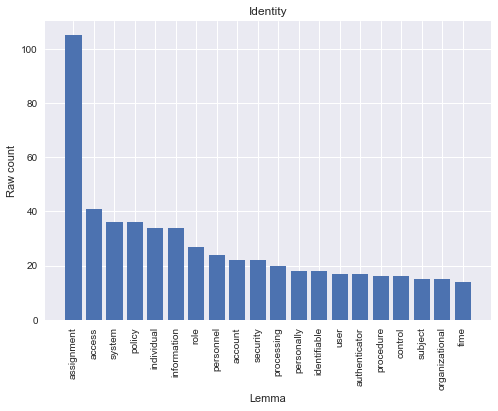

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)

num_top_lemmas_to_plot = 20
top_lemmas = [lemma for lemma, count in sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts)
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Identity")